In [ ]:
!pwd

/content


# Loading Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



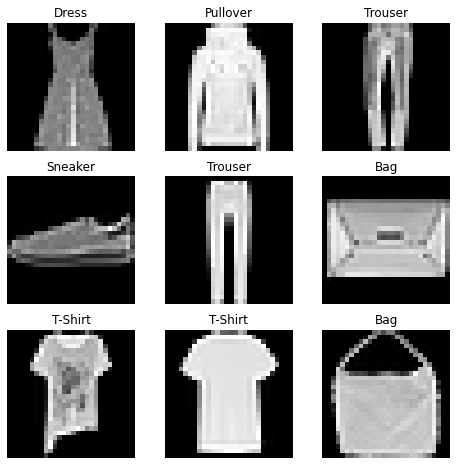

In [ ]:
# Classes
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # Generate random integers as index of training data
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    # Each training data consist of an array of pixels and a label
    img, label = training_data[sample_idx]

    # Add this picture to subplot
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

    # Display images using greyscale
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Transforms

In [ ]:
ds = datasets.FashionMNIST(
    root="data", 
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [2]:
f = lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)

In [3]:
f(2)

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])